In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:\Intellipaat Class\Time Series\daily-min-temperatures.csv", index_col = 0, parse_dates=True)
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [4]:
df.isnull().sum()

Temp    0
dtype: int64

In [5]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [6]:
df.shape

(3650, 1)

In [7]:
df.values

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13. ]])

In [8]:
df.value_counts()

Temp
11.0    51
10.0    51
13.0    48
9.0     44
12.5    44
        ..
21.1     1
1.8      1
20.9     1
0.1      1
26.3     1
Length: 229, dtype: int64

<AxesSubplot:xlabel='Date'>

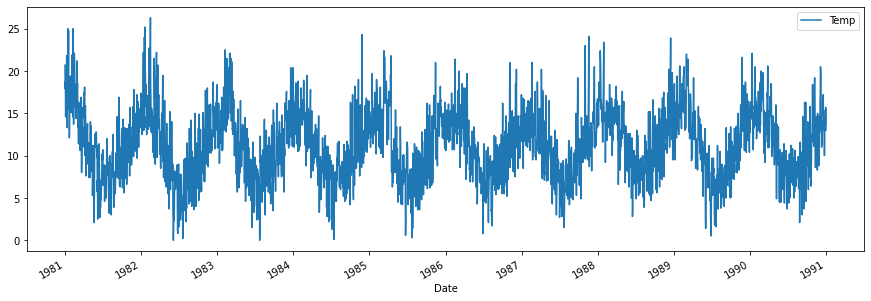

In [9]:
df.plot(figsize=(15,5))

from the above plot we can observe that their is constant Variance in the temperature, so the data may be stationary, let's confirm with one of the popular stationary check method i.e., ADFuller test

In [10]:
#Check for stationarity
from statsmodels.tsa.stattools import adfuller

In [11]:
dftest = adfuller(df['Temp'], autolag = 'AIC')

In [12]:
print(dftest)

(-4.4448049246117005, 0.0002470826300360988, 20, 3629, {'1%': -3.4321532327220154, '5%': -2.862336767636517, '10%': -2.56719413172842}, 16642.822304301197)


In [13]:
print(f'ADF = {dftest[0]}')
print(f'P_Value = {dftest[1]}')
print(f'No. of Lags = {dftest[2]}')
print(f'No. of Observations used for ADF Regression and Critical values calculation = {dftest[3]}')
print('Critical Values: ')
for key, value in dftest[4].items():
    print('\t', key, ':', value)

ADF = -4.4448049246117005
P_Value = 0.0002470826300360988
No. of Lags = 20
No. of Observations used for ADF Regression and Critical values calculation = 3629
Critical Values: 
	 1% : -3.4321532327220154
	 5% : -2.862336767636517
	 10% : -2.56719413172842


In [14]:
p_value = dftest[1]
print('P_value is : ', p_value)

if p_value < 0.05:
    print('The Data is stationary')
else:
    print('The Data is not Sattionary')

P_value is :  0.0002470826300360988
The Data is stationary


Here the data is stationary, now we need to find that, how many previous values do we need to consider to predict the future values, so here comes the concept of ACF and PACF plots, for AR Models we use PACF Plots

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


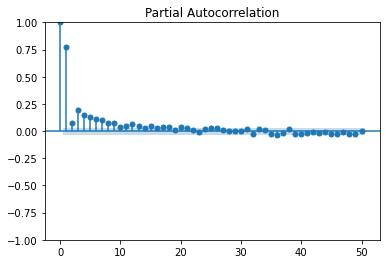

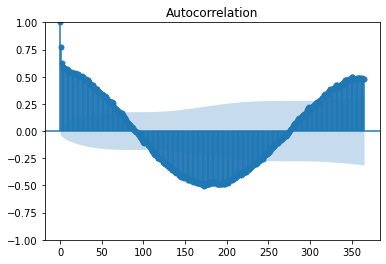

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf= plot_pacf(df['Temp'], lags=50)
acf = plot_acf(df['Temp'], lags=365)

From the above PACF we can say that upto 10 time lags(periods) their is a correlation. So we can consider no. of lags =10

In [29]:
X = df.values
X

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13. ]])

In [31]:
train = X[:len(X)-7]
test = X[-7:]

In [32]:
test

array([[12.9],
       [14.6],
       [14. ],
       [13.6],
       [13.5],
       [15.7],
       [13. ]])

In [33]:
from statsmodels.tsa.ar_model import AutoReg

In [34]:
model_ar = AutoReg(train, lags=10).fit()

In [37]:
print(model_ar.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Sun, 02 Jun 2024   AIC                          16775.028
Time:                        19:13:01   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [38]:
len(train)

3643

In [39]:
len(X)

3650

In [69]:
predict = model_ar.predict(start=len(train), end = len(X)-1, dynamic=False)

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


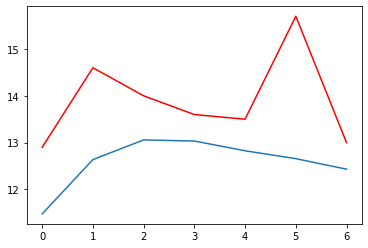

In [70]:
plt.plot(predict)
plt.plot(test, color='red')
print(predict)

In [71]:
predict_tr = model_ar.predict(start = 0, end= len(train), dynamic=False)

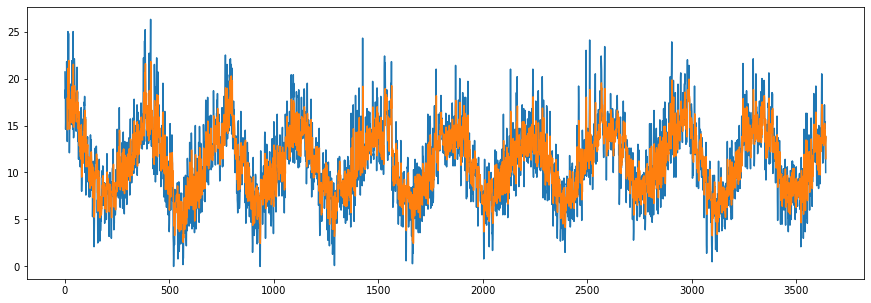

In [72]:
plt.figure(figsize=(15,5))
plt.plot(train)
plt.plot(predict_tr)

In [73]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predict))
rmse

1.5638196220860856

In [79]:
from sklearn.metrics import r2_score
r2_score(test, predict)

-1.9515039091293596

In [81]:
mse = mean_squared_error(test, predict)
mse

2.4455318104214676

now making future predictions for next 7 days

In [82]:
predict_ftr = model_ar.predict(len(X)+1, len(X)+7, dynamic=False)

[12.28608804 12.20309536 12.24915916 12.30618875 12.31199689 12.27225975
 12.21843712]


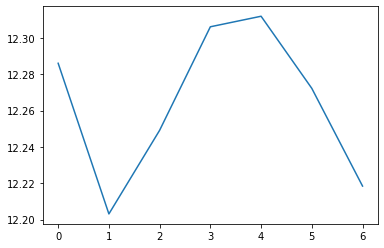

In [86]:
print(predict_ftr)
plt.plot(predict_ftr)